# Metric v1
Create a simple "score" to assign our known binaries, just based on the Color-Mag Diagram

Maybe get "fancy" and include orbital period

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.table import Table
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm

from glob import glob

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
# matplotlib.rcParams.update({'font.family':'serif'})

# for the TESS Science Online 48hr sprint, we'll be using Cyberpunk for the graphics!
# https://github.com/dhaitz/mplcyberpunk
import mplcyberpunk
plt.style.use("cyberpunk")

In [24]:
# smooth both EBs and Stars w/ a 2D Gaussian KDE
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xmin=-1, xmax = 5.5, ymin= -6, ymax=16,
          xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)
    https://stackoverflow.com/a/41639690"""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[xmin:xmax:xbins, 
                      ymin:ymax:ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

In [3]:
numerator = pd.read_csv('BigCat.csv')

denominator = pd.read_csv('gaia_tess2min.csv')

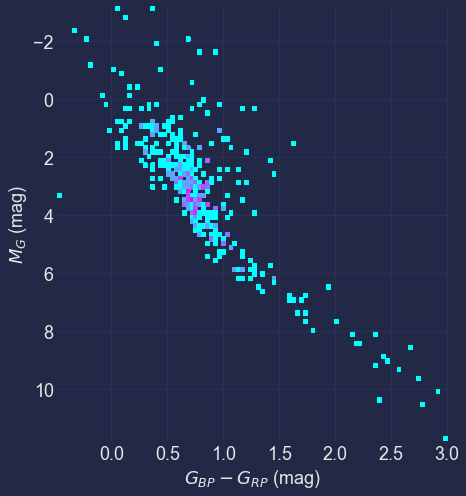

In [164]:
EHow = pd.read_csv('EHow.csv')
Eok = ((EHow['parallax'] > 0) & 
       np.isfinite(EHow['bp_rp']) & 
       np.isfinite(EHow['phot_g_mean_mag']))

plt.figure(figsize=(7,8))
plt.hist2d(EHow['bp_rp'][Eok], 
            EHow['phot_g_mean_mag'][Eok] - 5. * np.log10(1000./EHow['parallax'][Eok]) + 5,
           norm=LogNorm(), cmap=plt.cm.cool, bins=100)
 
plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)


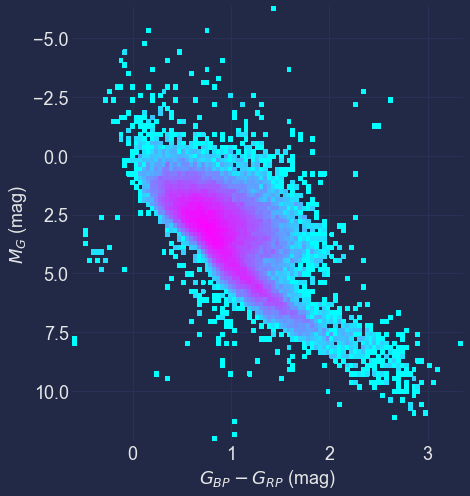

In [184]:
# lets plot the EBs in CMD space

Nok = ((numerator['parallax'] > 0) & 
       np.isfinite(numerator['bp_rp']) & 
       np.isfinite(numerator['phot_g_mean_mag']))

plt.figure(figsize=(7,8))
plt.hist2d(numerator['bp_rp'][Nok], 
            numerator['phot_g_mean_mag'][Nok] - 5. * np.log10(1000./numerator['parallax'][Nok]) + 5,
           norm=LogNorm(), cmap=plt.cm.cool, bins=100)
 
plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)
mplcyberpunk.add_glow_effects()

In [107]:
# i'm concerned about ASAS-SN... it's over-populated w/ stuff in a big clump!

11910


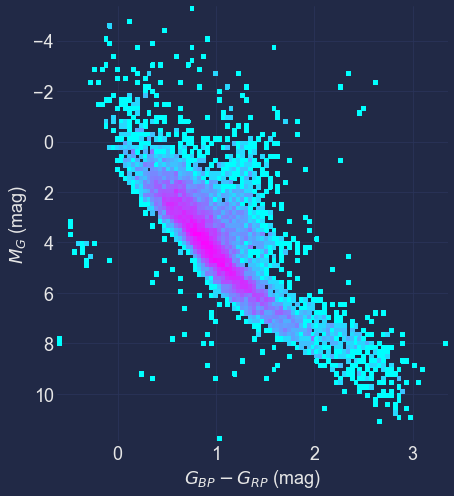

In [179]:
# adjust the cut to drop ASAS-SN for now
Nok = ((numerator['parallax'] > 0) & 
       (1000./numerator['parallax']< 40000) &
       np.isfinite(numerator['bp_rp']) & 
       np.isfinite(numerator['phot_g_mean_mag']) & 
       (np.arange(len(numerator)) < 12520)
      ) # all the EBs except ASAS-SN

print(sum(Nok))

plt.figure(figsize=(7,8))
plt.hist2d(numerator['bp_rp'][Nok], 
            numerator['phot_g_mean_mag'][Nok] - 5. * np.log10(1000./numerator['parallax'][Nok]) + 5,
           norm=LogNorm(), cmap=plt.cm.cool, bins=100)
 
plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)
mplcyberpunk.add_glow_effects()

In [154]:
# # adjust the cut to drop ASAS-SN and Catalina for now....

# Nok = ((numerator['parallax'] > 0) & 
#        np.isfinite(numerator['bp_rp']) & 
#        np.isfinite(numerator['phot_g_mean_mag']) & 
#        ((np.arange(len(numerator)) < 2346) | 
#         (np.arange(len(numerator) > 11209) & (np.arange(len(numerator)) < 12520)))
#       ) # all the EBs except ASAS-SN & catalina

# print(sum(Nok))

# plt.figure(figsize=(7,8))
# plt.hist2d(numerator['bp_rp'][Nok], 
#             numerator['phot_g_mean_mag'][Nok] - 5. * np.log10(1000./numerator['parallax'][Nok]) + 5,
#            norm=LogNorm(), cmap=plt.cm.cool, bins=100)
 
# plt.gca().invert_yaxis()

# plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
# plt.ylabel('$M_G$ (mag)')
# plt.grid(True)
# mplcyberpunk.add_glow_effects()

In [155]:
# # adjust the cut to drop ASAS-SN and Kepler for now....

# Nok = ((numerator['parallax'] > 0) & 
#        np.isfinite(numerator['bp_rp']) & 
#        np.isfinite(numerator['phot_g_mean_mag']) & 
#        (np.arange(len(numerator)) > 2346) & (np.arange(len(numerator)) < 12520)
#       ) # all the EBs except ASAS-SN & catalina

# print(sum(Nok))

# plt.figure(figsize=(7,8))
# plt.hist2d(numerator['bp_rp'][Nok], 
#             numerator['phot_g_mean_mag'][Nok] - 5. * np.log10(1000./numerator['parallax'][Nok]) + 5,
#            norm=LogNorm(), cmap=plt.cm.cool, bins=100)
 
# plt.gca().invert_yaxis()

# plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
# plt.ylabel('$M_G$ (mag)')
# plt.grid(True)
# mplcyberpunk.add_glow_effects()

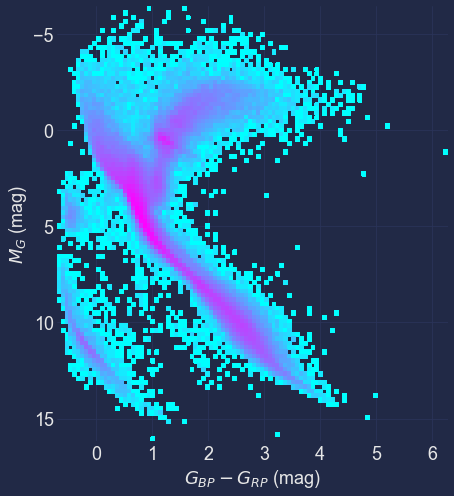

In [110]:
# lets plot all the TESS stars in CMD space

Dok = ((denominator['parallax'] > 0) & 
       np.isfinite(denominator['bp_rp']) & 
       np.isfinite(denominator['phot_g_mean_mag']))

plt.figure(figsize=(7,8))
plt.hist2d(denominator['bp_rp'][Dok], 
           denominator['phot_g_mean_mag'][Dok] - 5. * np.log10(1000./denominator['parallax'][Dok]) + 5,
           norm=LogNorm(), cmap=plt.cm.cool, bins=100)
 
plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)
mplcyberpunk.add_glow_effects()

In [189]:
# xx1, yy1, zz1 = kde2D(numerator['bp_rp'][Nok], 
#                       numerator['phot_g_mean_mag'][Nok] - 5. * np.log10(1000./numerator['parallax'][Nok]) + 5, 
#                       0.2)

xx1, yy1, zz1 = kde2D(EHow['bp_rp'][Eok], 
                      EHow['phot_g_mean_mag'][Eok] - 5. * np.log10(1000./EHow['parallax'][Eok]) + 5, 
                      0.2)

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


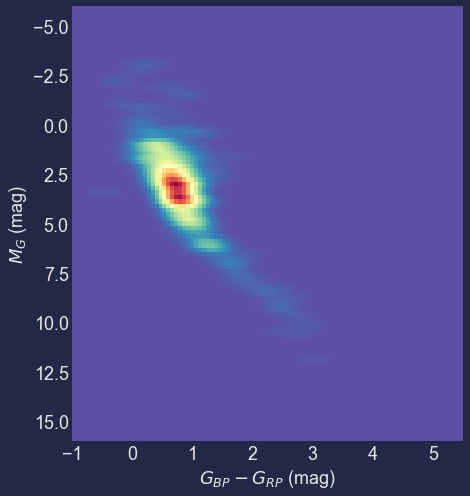

In [190]:
plt.figure(figsize=(7,8))

plt.pcolormesh(xx1, yy1, zz1, cmap=plt.cm.Spectral_r)
plt.gca().invert_yaxis()
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


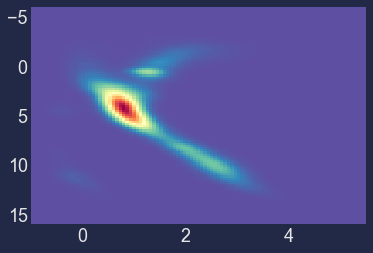

In [130]:
xx2, yy2, zz2 = kde2D(denominator['bp_rp'][Dok], 
                      denominator['phot_g_mean_mag'][Dok] - 5. * np.log10(1000./denominator['parallax'][Dok]) + 5, 
                      0.2)

plt.pcolormesh(xx2, yy2, zz2, cmap=plt.cm.Spectral_r)
plt.gca().invert_yaxis()

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


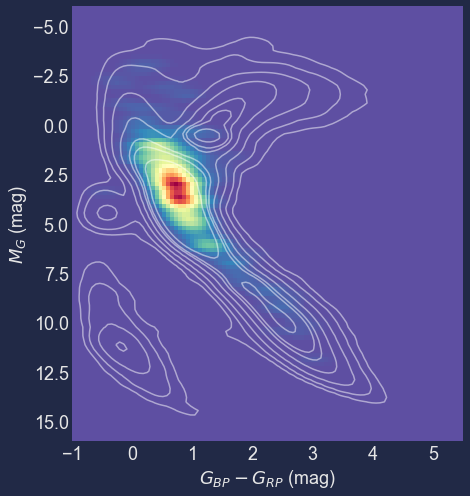

In [191]:
plt.figure(figsize=(7,8))

plt.pcolormesh(xx2, yy2, zz1, cmap=plt.cm.Spectral_r)
plt.gca().invert_yaxis()
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)
plt.contour(xx2, yy2, zz2/np.sum(zz2)*np.float(len(Dok)), 
            colors='white', levels=(1,3,10,30,70,100,200), alpha=0.5)

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


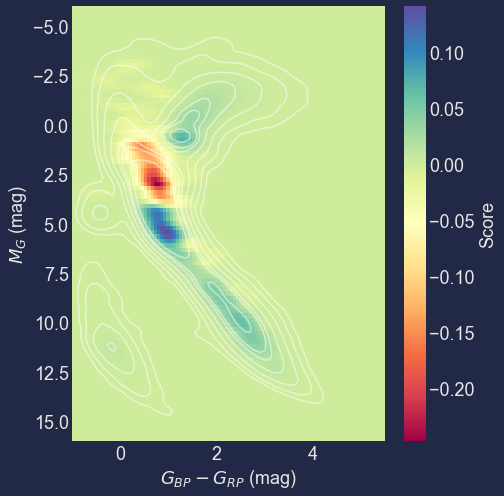

In [195]:
plt.figure(figsize=(7,8))
plt.pcolormesh(xx2, yy2, 1-(zz1+1)/(zz2+1), cmap=plt.cm.Spectral)
plt.gca().invert_yaxis()
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)
cb=plt.colorbar()
cb.set_label('Score')
mplcyberpunk.add_glow_effects()
# plt.contour(xx2, yy2, (zz1+1)/(zz2+1), colors='white')
plt.contour(xx2, yy2, zz2/np.sum(zz2)*np.float(len(Dok)), 
            colors='white', levels=(1,3,10,30,70,100,200), alpha=0.5)



here are the boundary conditions i *want* to satisfy: 

Score == 1 if there are no EBs, regardless of # of background stars!

Score == 0 if there are lots of EBs relative to the # of background stars

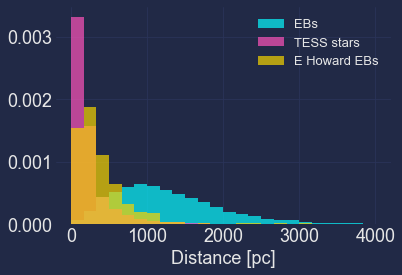

In [182]:
_ = plt.hist(1000./numerator['parallax'][Nok], density=True, alpha=0.7, bins=np.linspace(0,4000,25), label='EBs')
_ = plt.hist(1000./denominator['parallax'][Dok], density=True, alpha=0.7, bins=np.linspace(0,4000,25), label='TESS stars')
_ = plt.hist(1000./EHow['parallax'][Eok], density=True, alpha=0.7, bins=np.linspace(0,4000,25), label='E Howard EBs')

plt.xlabel('Distance [pc]')
plt.legend(fontsize=13)

In [153]:
# OK, i think this bimodal blue/red score we're getting at bp-rp=1 is b/c the samples are 
# drawn from radically different [Fe/H] distributions, and separating in the CMD